<a href="https://colab.research.google.com/github/olivierlubet/IBM_advanced_datascience_Coursera_Capstone/blob/master/GDN_Analysis_step_1_data_exp_python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grand Débat National - Data Exploration
Open data are published under the following link : https://granddebat.fr/pages/donnees-ouvertes

The following analyses focuses on the first an lightest file

## Installing and importing required libraries 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Technical note
It appeares that loading files json formatted into sparkresults in "java out of memory" whereas pandas smoothly parsed them. The following code will mainly rely on pandas

# Description of the main model - questionnaire

In [0]:
df = pd.read_json('http://opendata.auth-6f31f706db6f4a24b55f42a6a79c5086.storage.sbg5.cloud.ovh.net/2019-01-31/LA_TRANSITION_ECOLOGIQUE.json')

## Fields

In [0]:
df.dtypes

authorId         object
authorType       object
authorZipCode     int64
createdAt        object
publishedAt      object
reference        object
responses        object
title            object
trashed            bool
trashedStatus    object
updatedAt        object
dtype: object

In [0]:
for f in ['authorType','authorZipCode','title','trashedStatus']:
  print(f,':',len(df[f].unique()),' ',df[f].unique())
  print('---')

authorType : 5   ['Citoyen / Citoyenne' None 'Élu / élue et Institution'
 'Organisation à but non lucratif' 'Organisation à but lucratif']
---
authorZipCode : 5325   [97231 57000 34140 ... 80210 13104 12410]
---
title : 30735   ['transition écologique' 'La surpopulation' 'climat' ...
 "Réduire l'électricité"
 "Contraindre les entreprises à produire selon des normes respectueuses de l'environnement"
 'utilisation des diverses énergies']
---
trashedStatus : 2   [None 'VISIBLE']
---


## Counts

In [0]:
df.count()

authorId         35982
authorType       34654
authorZipCode    35982
createdAt        35982
publishedAt      35982
reference        35982
responses        35982
title            35982
trashed          35982
trashedStatus        8
updatedAt         1981
dtype: int64

## Samples

In [0]:
df.head(3)

,authorId,authorType,authorZipCode,createdAt,publishedAt,reference,responses,title,trashed,trashedStatus,updatedAt
0,VXNlcjoxMTQwMTc0YS0xZTFmLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,97231,2019-01-22 09:37:49,2019-01-22 09:37:49,2-4,"[{'questionId': '160', 'questionTitle': 'Quel ...",transition écologique,False,None,None
1,VXNlcjpjOWYxZWQ1NS0xYzEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,57000,2019-01-22 09:39:33,2019-01-22 09:39:33,2-5,"[{'questionId': '160', 'questionTitle': 'Quel ...",La surpopulation,False,None,None
2,VXNlcjozZjlhNzAwOS0xYTc2LTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,34140,2019-01-22 09:39:50,2019-01-22 09:39:50,2-6,"[{'questionId': '160', 'questionTitle': 'Quel ...",climat,False,None,None


# Description of submodel - question & answers

## Fields

In [0]:
list_rep = [item for sublist in df.responses.tolist() for item in sublist]
df_rep = pd.DataFrame(list_rep)
df_rep.dtypes

formattedValue    object
questionId        object
questionTitle     object
value             object
dtype: object

## Samples

In [0]:
df_rep.head(5)

,formattedValue,questionId,questionTitle,value
0,,160,Quel est aujourd'hui pour vous le problème con...,"{""labels"":[],""other"":null}"
1,None,161,Que faudrait-il faire selon vous pour apporter...,None
2,,146,Diriez-vous que votre vie quotidienne est aujo...,"{""labels"":[],""other"":null}"
3,None,147,"Si oui, de quelle manière votre vie quotidienn...",None
4,,148,"À titre personnel, pensez-vous pouvoir contrib...","{""labels"":[],""other"":null}"


## Filtered samples

In [0]:
filter = (df_rep.formattedValue.notnull()) & (df_rep.formattedValue!='') 
df_rep_f = df_rep[filter]

In [0]:
df_rep_f.head(5)

,formattedValue,questionId,questionTitle,value
14,Enseignement du tri sélectif à l'école,158,Que pourrait faire la France pour faire partag...,Enseignement du tri sélectif à l'école
15,Multiplier les centrales géothermiques,159,Y a-t-il d'autres points sur la transition éco...,Multiplier les centrales géothermiques
16,Les problèmes auxquels se trouve confronté l’e...,160,Quel est aujourd'hui pour vous le problème con...,"{""labels"":[],""other"":""Les problèmes auxquels s..."
17,Les problèmes auxquels se trouve confronté l’e...,161,Que faudrait-il faire selon vous pour apporter...,Les problèmes auxquels se trouve confronté l’e...
30,Mettre en oeuvre au niveau national ses engage...,158,Que pourrait faire la France pour faire partag...,Mettre en oeuvre au niveau national ses engage...


In [0]:
filter = (df_rep.formattedValue.notnull()) & (df_rep.formattedValue!='')  & (df_rep.formattedValue!='Oui') & (df_rep.formattedValue!='Non') 
df_rep_ff = df_rep[filter][['questionTitle','formattedValue']].reset_index()

In [0]:
df_rep_ff.head(10)

,index,questionTitle,formattedValue
0,14,Que pourrait faire la France pour faire partag...,Enseignement du tri sélectif à l'école
1,15,Y a-t-il d'autres points sur la transition éco...,Multiplier les centrales géothermiques
2,16,Quel est aujourd'hui pour vous le problème con...,Les problèmes auxquels se trouve confronté l’e...
3,17,Que faudrait-il faire selon vous pour apporter...,Les problèmes auxquels se trouve confronté l’e...
4,30,Que pourrait faire la France pour faire partag...,Mettre en oeuvre au niveau national ses engage...
5,31,Y a-t-il d'autres points sur la transition éco...,Les problèmes auxquels se trouve confronté l’e...
6,32,Quel est aujourd'hui pour vous le problème con...,"Les dérèglements climatiques (crue, sécheresse)"
7,33,Que faudrait-il faire selon vous pour apporter...,pour éviter les inondations obliger les rivera...
8,38,Qu'est-ce qui pourrait vous inciter à changer ...,"développer les transports en commun ,"
9,44,"Si non, quelles sont les solutions de mobilité...","Les transports en commun, L'auto partage, Le t..."


## Counts

In [0]:
print('Number of answers:',len(df_rep))
print('Number of filtered answers:',len(df_rep_f))
print('Number of filtered answers (without "Oui" or "Non"):',len(df_rep_ff))
print('Number of unique questions:',len(df_rep.questionTitle.unique()))

Number of answers: 575712
Number of filtered answers: 439008
Number of filtered answers (without "Oui" or "Non"): 315721
Number of unique questions: 16


# Some other analysis
## Number of answers by questions

In [0]:
dt_chart_categories = (pd.DataFrame(
    df_rep_ff.groupby('questionTitle')
    .formattedValue.nunique())
                       .rename(columns={'formattedValue':'count'})
                       .sort_values(by='count', ascending=False)
                       .reset_index()
                      )
dt_chart_categories['index'] = dt_chart_categories.index
dt_chart_categories.head(20)

,questionTitle,count,index
0,Que faudrait-il faire selon vous pour apporter...,32047,0
1,"Si oui, que faites-vous aujourd'hui pour proté...",30227,1
2,Qu'est-ce qui pourrait vous inciter à changer ...,26712,2
3,Que pourrait faire la France pour faire partag...,25164,3
4,Y a-t-il d'autres points sur la transition éco...,24094,4
5,Quelles seraient pour vous les solutions les p...,23765,5
6,"Si oui, de quelle manière votre vie quotidienn...",19954,6
7,"Si oui, que faudrait-il faire pour vous convai...",18884,7
8,Et qui doit selon vous se charger de vous prop...,18742,8
9,"Si oui, que faudrait-il faire pour vous convai...",15863,9


In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


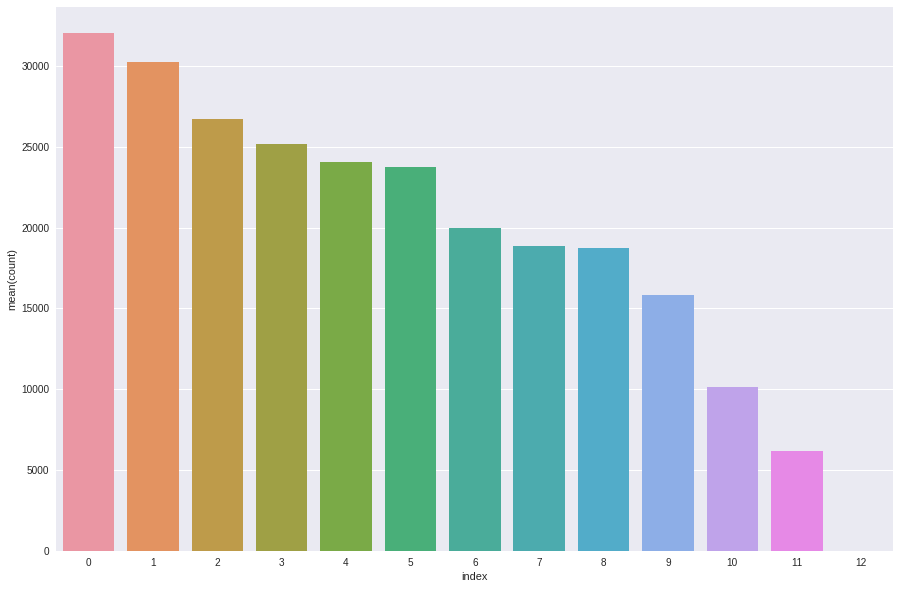

In [0]:
plt.figure(figsize=(15,10))
sns.barplot(data=dt_chart_categories, x='index', y='count')


## Size of answers

In [0]:
df_rep_ff.head(5)

,index,questionTitle,formattedValue
0,14,Que pourrait faire la France pour faire partag...,Enseignement du tri sélectif à l'école
1,15,Y a-t-il d'autres points sur la transition éco...,Multiplier les centrales géothermiques
2,16,Quel est aujourd'hui pour vous le problème con...,Les problèmes auxquels se trouve confronté l’e...
3,17,Que faudrait-il faire selon vous pour apporter...,Les problèmes auxquels se trouve confronté l’e...
4,30,Que pourrait faire la France pour faire partag...,Mettre en oeuvre au niveau national ses engage...


In [0]:
df_rep_ff['len'] = df_rep_ff['formattedValue'].map(len)
df_rep_ff.head(5)

,index,questionTitle,formattedValue,len
0,14,Que pourrait faire la France pour faire partag...,Enseignement du tri sélectif à l'école,38
1,15,Y a-t-il d'autres points sur la transition éco...,Multiplier les centrales géothermiques,38
2,16,Quel est aujourd'hui pour vous le problème con...,Les problèmes auxquels se trouve confronté l’e...,1289
3,17,Que faudrait-il faire selon vous pour apporter...,Les problèmes auxquels se trouve confronté l’e...,1289
4,30,Que pourrait faire la France pour faire partag...,Mettre en oeuvre au niveau national ses engage...,66


In [0]:
def len_size(l):
  if l < 10 : return 'XS'
  elif l < 100 : return 'S'
  elif l < 500 : return 'M'
  elif l < 2000 : return 'L'
  else : return 'XL'

df_rep_ff['size'] = df_rep_ff['len'].map(len_size)
df_rep_ff.sample(10).head(10)

,index,questionTitle,formattedValue,len,size
100384,183201,Que faudrait-il faire selon vous pour apporter...,Trop d'entreprises polluantes et on entend ne ...,347,M
10316,19401,"Si oui, que faudrait-il faire pour vous convai...",Je me chauffe à électricité. \nDonner les moye...,127,M
36143,66844,"Si non, quelles sont les solutions de mobilité...",Le vélo,7,XS
167744,304099,"Si oui, de quelle manière votre vie quotidienn...","modification des saisons, sur-sècheresse des é...",54,S
111958,203793,Que faudrait-il faire selon vous pour apporter...,"La pollution générale (air, eau, de la terre, ...",770,L
150597,272833,Que faudrait-il faire selon vous pour apporter...,Sanctionner les plus pollueurs les grands grou...,75,S
14443,26805,"Si oui, que faites-vous aujourd'hui pour proté...",Nous avons installé la domotique pour limiter ...,660,L
145281,263595,"Si oui, que faudrait-il faire pour vous convai...",Développer les transports en commun ou le syst...,137,M
282068,514305,Que faudrait-il faire selon vous pour apporter...,Utiliser des énergie renouvelables le plus pos...,107,M
226481,412043,"Si oui, que faudrait-il faire pour vous convai...",Que les transports en commun soient plus effic...,137,M


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


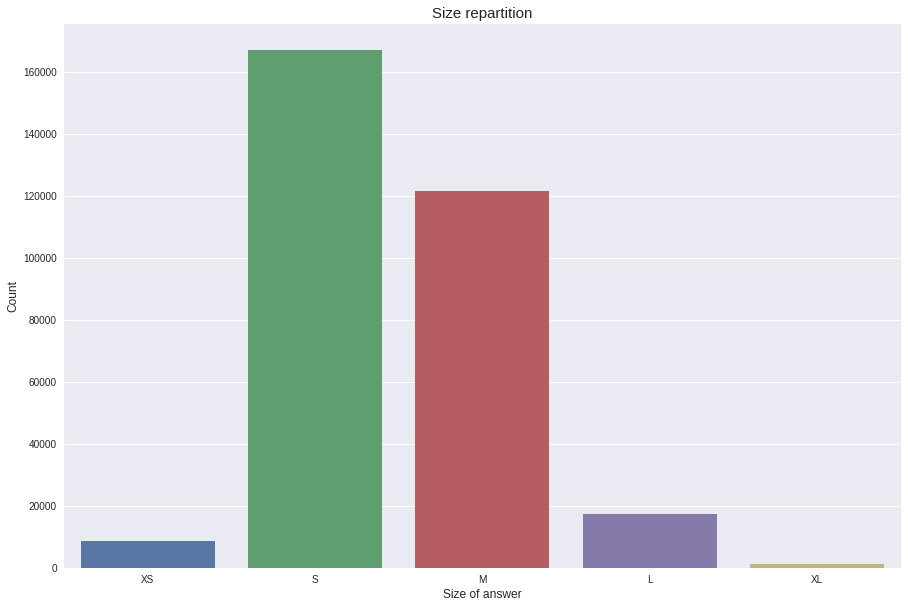

In [0]:
plt.figure(figsize=(15,10))
sns.countplot(df_rep_ff['size'],order=['XS','S','M','L','XL'])
plt.xlabel("Size of answer", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Size repartition", fontsize=15)
plt.show()

## Word count

In [0]:
def word_count (sentence) :
  for char in '-.,\n':
    sentence=sentence.replace(char,' ')
  return len(sentence.split())

In [0]:
assert(word_count("short sentence")==2)
s="""
Big, and
complex sen-tence'ee
"""
assert(word_count(s)==5)

In [0]:
df_rep_ff['wc']=df_rep_ff.formattedValue.map(word_count)
df_rep_ff.head(5)

,index,questionTitle,formattedValue,len,size,wc
0,14,Que pourrait faire la France pour faire partag...,Enseignement du tri sélectif à l'école,38,S,6
1,15,Y a-t-il d'autres points sur la transition éco...,Multiplier les centrales géothermiques,38,S,4
2,16,Quel est aujourd'hui pour vous le problème con...,Les problèmes auxquels se trouve confronté l’e...,1289,L,212
3,17,Que faudrait-il faire selon vous pour apporter...,Les problèmes auxquels se trouve confronté l’e...,1289,L,212
4,30,Que pourrait faire la France pour faire partag...,Mettre en oeuvre au niveau national ses engage...,66,S,9


In [0]:
df_rep_ff.wc.describe()

count    315721.000000
mean         26.785922
std          70.402631
min           0.000000
25%           6.000000
50%          13.000000
75%          29.000000
max       20162.000000
Name: wc, dtype: float64

## 75% answers are < 30 words, it should be our limit